# Лаба №1: интерполирование функции с помощью _Полиномов Лагранжа_
## Ну я думаю было бы хайпово так же добавить чушню с помощью полиномов Ньютона, барицентрического Лагранжа

Мы вот значит короче сначала импортируем сигма слово пацана либы чтобы просто разматать эту задачку 

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
def q_n(x, n):
    numerator = x * x * (2 * n + 1)
    denominator = (n + 1) * (2 * n + 3)

    return -numerator / denominator


def erf(x, precision=1e-6):
    a_i = x
    result = a_i
    n = 0

    while abs(a_i) > precision:
        a_i *= q_n(x, n)
        result += a_i
        n += 1

    return (2 / math.pi ** .5) * result

In [3]:
def lagrange(x, f_x_i, x_i):
    result = 0
    for i in range(len(x_i)):
        temp = 1
        for j in range(len(x_i)):
            if i == j:
                continue

            temp *= (x - x_i[j]) / (x_i[i] - x_i[j])

        result += temp * f_x_i[i]

    return result

In [53]:
def cheb_node(i, a, b, n):
    temp = (b - a) / 2
    factor = (2 * i + 1) / (2 * n + 2)
    return temp + temp * math.cos(factor * math.pi)

In [57]:
a = 0
b = 2
n = 1000

indices = np.linspace(a, b, n)
f_vals = [erf(x) for x in indices]

chebs = [cheb_node(i, a, b, n) for i in range(n)]
f_vals_cheb = [erf(x) for x in chebs]

# Значение функции в 11 точках

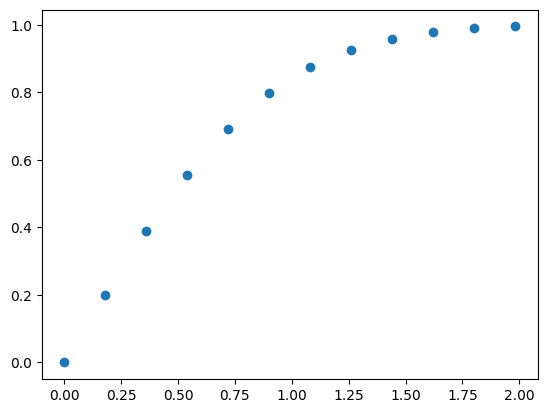

In [10]:
plt.scatter(indices[::1000//11], f_vals[::1000//11])

# Интерполирование по равномерным узлам

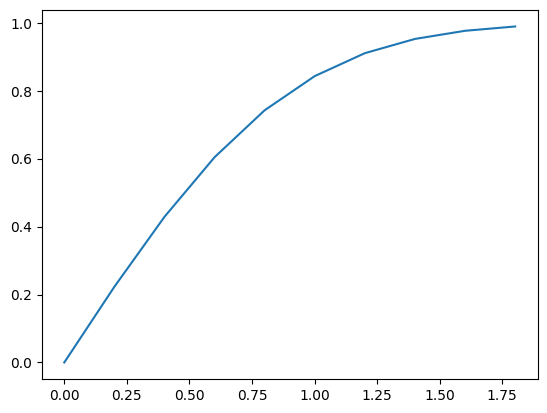

In [51]:
m = 10
lag_vals = [lagrange(x, f_vals[::1000//m], indices[::1000//m]) for x in indices]
plt.plot(indices[::1000//m], lag_vals[::1000//m])

5.775101686833484e-05

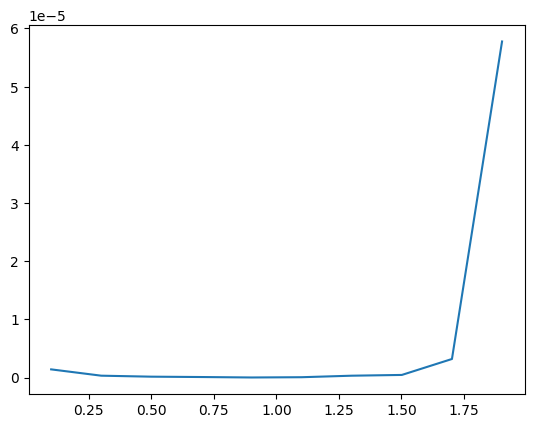

In [52]:
delta = [abs(lag_vals[x] - f_vals[x]) for x in range(500//m, len(indices), 1000//m)]
plt.plot(indices[500//m::1000//m], delta)
float(max(delta))

# Эксперимент c равномерными узлами
Узлов стало на $23$ больше, итого $10$ -> $23$

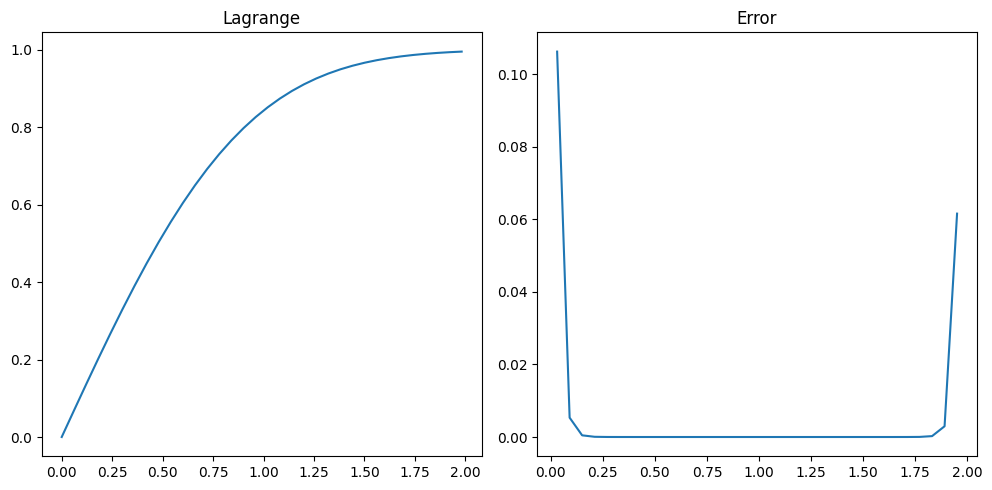

Максимальная погрешность:


0.10627817023451833

In [47]:
m = 33
lag_vals = [lagrange(x, f_vals[::1000//m], indices[::1000//m]) for x in indices]
delta = [abs(lag_vals[x] - f_vals[x]) for x in range(500//m, len(indices), 1000//m)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(indices[::1000//m], lag_vals[::1000//m])
axes[0].set_title("Lagrange")

axes[1].plot(indices[500//m::1000//m], delta)
axes[1].set_title("Error")

plt.tight_layout()
plt.show()

print('Максимальная погрешность:')
float(max(delta))

# Интерполяция по узлам Чебышева

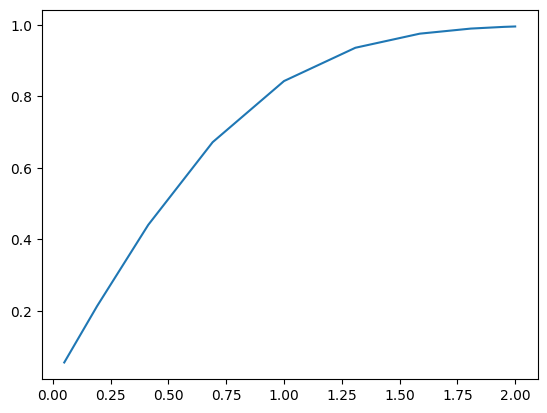

In [58]:
m = 10
lag_vals = [lagrange(x, f_vals_cheb[::1000//m], chebs[::1000//m]) for x in chebs]
plt.plot(chebs[::1000//m], lag_vals[::1000//m])

1.8713705752708074e-05

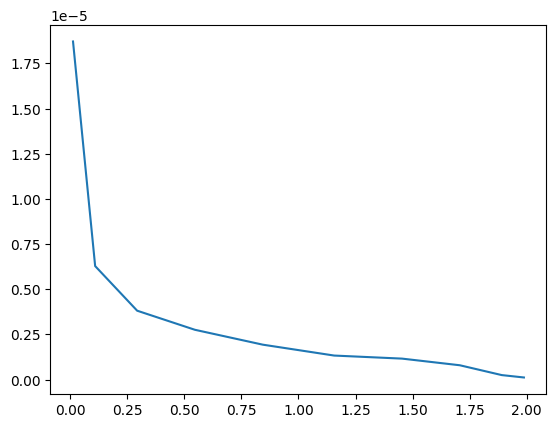

In [60]:
delta = [abs(lag_vals[x] - f_vals_cheb[x]) for x in range(500//m, len(chebs), 1000//m)]
plt.plot(chebs[500//m::1000//m], delta)
float(max(delta))

# Эксперимент с узлами Чебы
Узлов стало на $490$ больше, итого $10$ -> $500$

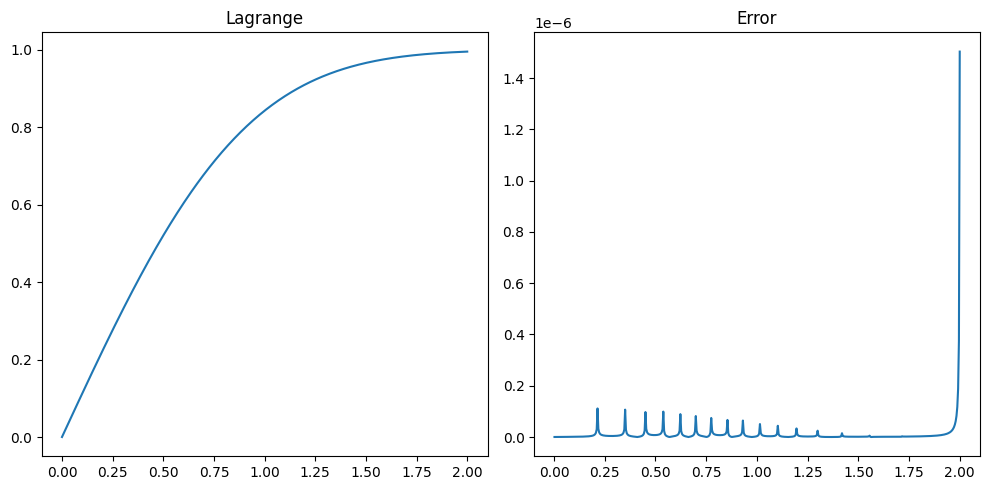

Максимальная погрешность:


1.503721012622571e-06

In [64]:
m = 500
lag_vals = [lagrange(x, f_vals_cheb[::1000//m], chebs[::1000//m]) for x in chebs]
delta = [abs(lag_vals[x] - f_vals_cheb[x]) for x in range(500//m, len(chebs), 1000//m)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(chebs[::1000//m], lag_vals[::1000//m])
axes[0].set_title("Lagrange")

axes[1].plot(indices[500//m::1000//m], delta)
axes[1].set_title("Error")

plt.tight_layout()
plt.show()

print('Максимальная погрешность:')
float(max(delta))